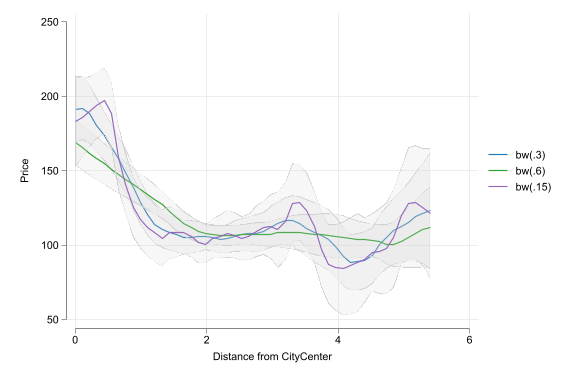

In [2]:
*| echo: true
*| code-fold: true
*| fig-align: center
set scheme white2
color_style tableau
use data_slides/hotels-vienna.dta, clear
qui:drop if distance>6
two (lpolyci price distance, bw(.3) fcolor(%20)) ///
(lpolyci price distance, bw(.6) fcolor(%20)) ///
(lpolyci price distance, bw(.15) fcolor(%20)), ///
legend(order(2 "bw(.3)" 4 "bw(.6)" 6 "bw(.15)")) ///
ytitle("Price") xtitle("Distance from CityCenter")

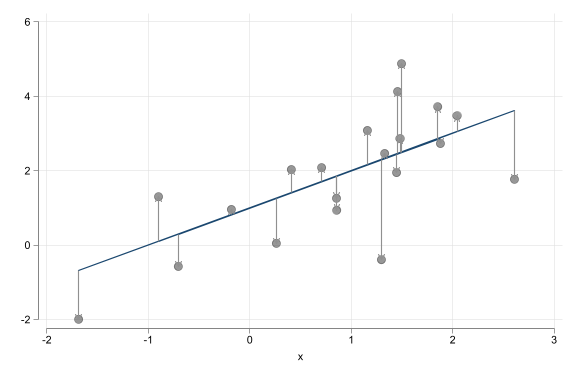

In [3]:
*| echo: true
*| code-fold: true
*| fig-align: center
clear 
qui:set obs 20
qui:gen x = rnormal()+1
qui:gen y = 1+x+rnormal()
qui:gen yh=1+x
two (scatter y x, msize(3) mcolor(gs3%50)) ///
   (line yh x, color(navy)) (pcarrow yh x y x, color(gs9)), ///
legend(off)

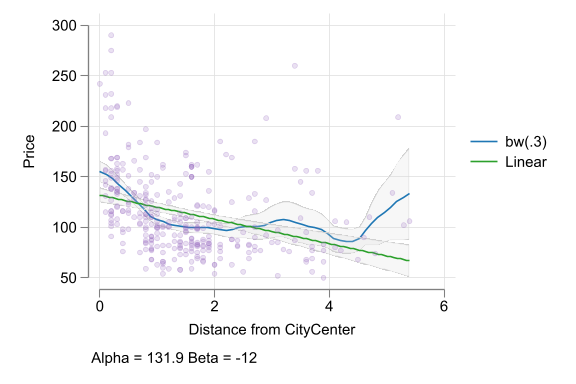

In [4]:
*| echo: true
*| code-fold: true
*| fig-align: center
 
use data_slides/hotels-vienna.dta, clear
qui:drop if distance>6
qui: keep if inrange(stars,3,4)
qui: drop if price>300
two (lpolyci price distance, bw(.3) fcolor(%20)) ///
(lfitci price distance, fcolor(%20)) ///
(scatter price distance, color(%20)), ///
legend(order(2 "bw(.3)" 4 "Linear" )) ///
ytitle("Price") xtitle("Distance from CityCenter") ///
scale(1.4) note(Alpha = 131.9 Beta = -12)

In [5]:
*| echo: true
*| code-fold: true
qui:drop2 pr_hat res
qui:reg price distance
qui:predict pr_hat
qui:predict res, res
qui:sort res
list hotel_id price distance pr_hat res star in 1/5

variable pr_hat not found
variable res not found



     +------------------------------------------------------------+
     | hotel_id   price   distance     pr_hat         res   stars |
     |------------------------------------------------------------|
  1. |    22080      54        1.1   118.6571   -64.65714       3 |
  2. |    22122      59         .8   122.2709    -63.2709       3 |
  3. |    21912      60        1.1   118.6571   -58.65714       4 |
  4. |    22073      59        1.2   117.4525   -58.45255       3 |
  5. |    22127      58        1.4   115.0434   -57.04337     3.5 |
     +------------------------------------------------------------+


In [6]:
*| echo: true
*| code-fold: true
*| output: asis
qui {
  set linesize 255
  capture gen log_price = log(price)
  capture gen log_distance = log(distance)
  regress price distance
  est sto m1
  regress log_price distance
  est sto m2
  regress price log_distance
  est sto m3
  regress log_price log_distance
  est sto m4
}
esttab m1 m2 m3 m4, se md nostar nonumber note("")



|              |        price |    log\_price |        price |    log\_price |
| ------------ | :----------: | :----------: | :----------: | :----------: |
| distance     |       -12.05 |       -0.104 |              |              |
|              |      (2.001) |     (0.0161) |              |              |
| log\_distance |              |              |       -21.28 |       -0.176 |
|              |              |              |      (2.251) |     (0.0183) |
| \_cons       |        131.9 |        4.829 |        114.8 |        4.682 |
|              |      (3.740) |     (0.0301) |      (2.087) |     (0.0169) |
| *N*          |          321 |          321 |          320 |          320 |





In [7]:
*| echo: true
*| code-fold: false
*| output: false
*              v Knot  v knot2
mkspline dist1 1 dist2 2 dist3= distance  

In [8]:
*| echo: true
*| code-fold: 

regress price dist1 dist2 dist3


      Source |       SS           df       MS      Number of obs   =       321
-------------+----------------------------------   F(3, 317)       =     41.08
       Model |  162850.558         3  54283.5192   Prob > F        =    0.0000
    Residual |  418846.994       317  1321.28389   R-squared       =    0.2800
-------------+----------------------------------   Adj R-squared   =    0.2731
       Total |  581697.551       320  1817.80485   Root MSE        =    36.349



------------------------------------------------------------------------------


       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]


-------------+----------------------------------------------------------------
       dist1 |

  -75.91485   8.747817    -8.68   0.000    -93.12596   -58.70373


       dist2 |  -.1596926   7.344118    -0.02   0.983    -14.60907    14.28968
       dist3 |    2.54916   3.843377     0.66   0.508     -5.01259    10.11091
       _cons |   174.5939   6.098417    28.63   0.000     162.5954    186.5924


------------------------------------------------------------------------------


In [9]:
*| echo: true
*| code-fold: false
use data_slides/wb-lifeexpectancy.dta, clear
keep if year == 2017
sum gdppc lifeexp

(4,847 observations deleted)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       gdppc |        182    19.22786    20.38674   .6707771   113.2622
     lifeexp |        182    72.30765    7.648017     52.214   84.68049


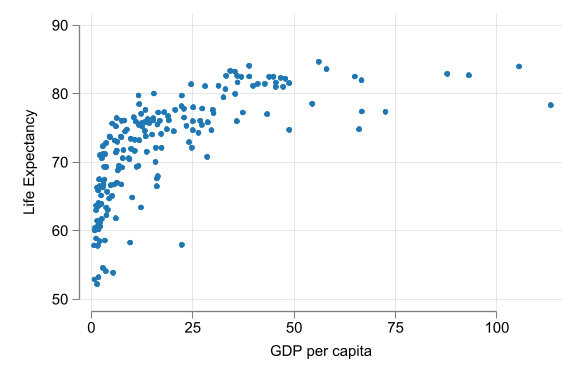

In [10]:
*| echo: true
*| code-fold: true
*| fig-align: center

scatter lifeexp gdppc, scale(1.4) ///
ytitle(Life Expectancy) xtitle(GDP per capita) ///
xlabel(0(25)100)

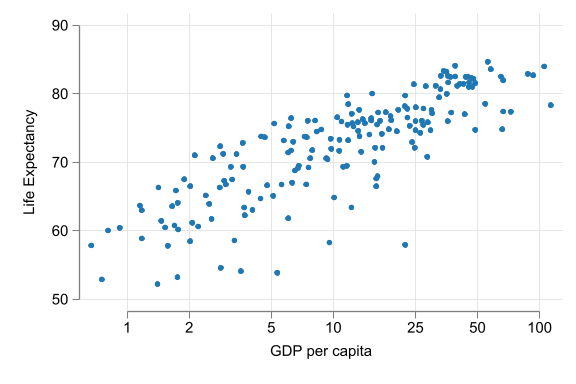

In [11]:
*| echo: true
*| code-fold: true
*| fig-align: center

scatter lifeexp gdppc, scale(1.4) ///
ytitle(Life Expectancy) xtitle(GDP per capita) ///
xscale(log) xlabel(1 2 5 10 25 50 100)

In [12]:
*| echo: true
*| code-fold: false
gen log_gdp = log(gdppc)
regress lifeexp log_gdp
predict resid, res
predict life_hat
sort resid


      Source |       SS           df       MS      Number of obs   =       182
-------------+----------------------------------   F(1, 180)       =    382.77
       Model |  7200.86382         1  7200.86382   Prob > F        =    0.0000
    Residual |  3386.21735       180  18.8123186   R-squared       =    0.6802
-------------+----------------------------------   Adj R-squared   =    0.6784
       Total |  10587.0812       181  58.4921612   Root MSE        =    4.3373

------------------------------------------------------------------------------
     lifeexp | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     log_gdp |   5.333648   .2726172    19.56   0.000     4.795712    5.871585
       _cons |   59.65933   .7220205    82.63   0.000     58.23462    61.08404
------------------------------------------------------------------------------
(option xb assumed; fitted values)


In [13]:
*| echo: true
*| code-fold: false
list countryname lifeexp gdppc life_hat if inrange(_n,1,5) | inrange(_n,178,182) 


     +---------------------------------------------------+
     |       countryname   lifeexp      gdppc   life_hat |
     |---------------------------------------------------|
  1. | Equatorial Guinea    57.939   22.29894   76.21785 |
  2. |           Nigeria    53.875   5.351441   68.60581 |
  3. |          Eswatini    58.268   9.567586   71.70473 |
  4. |     Cote d'Ivoire    54.102   3.564596   66.43867 |
  5. |           Lesotho    54.568   2.845889   65.23766 |
     |---------------------------------------------------|
178. |           Lebanon    79.758   11.64702    72.7537 |
179. |           Vietnam    76.454   6.233485   69.41956 |
180. |           Vanuatu    72.334    2.82708   65.20229 |
181. |         Nicaragua    75.653   5.169298   68.42111 |
182. |   Solomon Islands    71.006   2.126353   63.68308 |
     +---------------------------------------------------+


(option xb assumed; fitted values)


(option xb assumed; fitted values)


(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)


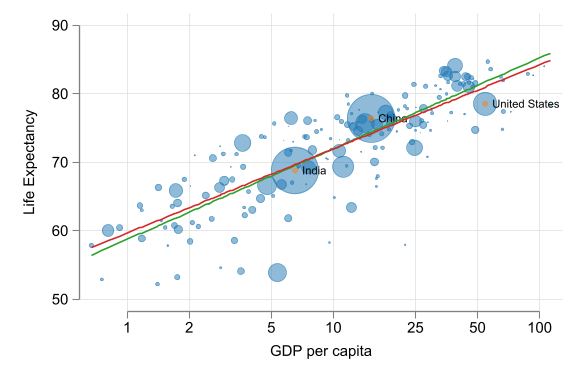

In [14]:
*| echo: true
*| fig-align: center
*| code-fold: true
qui: reg lifeexp log_gdp [w=population ]
predict life_hatw
qui: reg lifeexp log_gdp 
predict life_hatnw
*p*redict life_hat
two (scatter lifeexp gdppc [w=population ],  color(%50)) ///
(scatter lifeexp gdppc [w=population ] if inlist(countryname,"China","India","United States"),  color(%50) mlabel(countryname)) ///
(line life_hatw life_hatnw gdppc,sort  ), scale(1.4) legend(off) ///
ytitle(Life Expectancy) xtitle(GDP per capita) ///
xscale(log) xlabel(1 2 5 10 25 50 100)

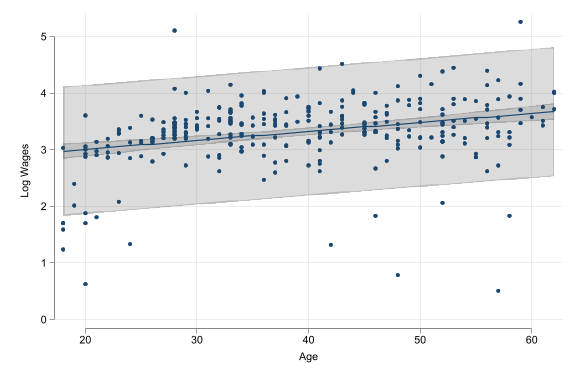

In [15]:
*| echo: true
*| code-fold: true
*| fig-align: center
qui:ssc install frause,
qui:frause oaxaca, clear
qui: drop if runiform()<.8 
qui: sort age
qui: reg lnwage age
qui: predict lnwage_hat
qui: predict se_ci, stdp
qui: predict se_pi, stdf
qui: gen ci_low = lnwage_hat - 1.96*se_ci
qui: gen ci_up = lnwage_hat + 1.96*se_ci
qui: gen pi_low = lnwage_hat - 1.96*se_pi
qui: gen pi_up = lnwage_hat + 1.96*se_pi
twoway  (rarea pi_low pi_up age, color(gs5%25) ) ///
(rarea ci_low ci_up age, color(gs5%25) ) ///
       (scatter lnwage age, color(navy)) (line lnwage_hat age, color(navy)) ///
       , legend(off) ytitle(Log Wages) xtitle(Age)